<div style="background-color:yellow;">
    <h1 align="center"></h1>
    <h2 align="center">Zeynab Khorshidi</h2>
    <h3 align="center">Boston House price</h3>
    <h4 align="center">Test the model</h4>
    <h5 align="center"></h5>
</div>

In [26]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [27]:
from sklearn import datasets 
from sklearn.datasets import load_boston
boston = load_boston()

In [28]:
data = pd.DataFrame(boston.data, columns=boston.feature_names)

In [29]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [30]:
data['PRICE'] = boston.target

In [31]:
X = data[['RM']]
y = data['PRICE']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

In [33]:
slr = LinearRegression()

slr.fit(X_test, y_test)

LinearRegression()

In [34]:
slr.intercept_

-35.814811315251646

In [35]:
slr.coef_

array([9.30606393])

In [36]:
coeffcients = pd.DataFrame([X_test.columns,slr.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,RM,9.306064


In [37]:
y_pred = slr.predict(X_test)

In [38]:
print('R^2:',metrics.r2_score(y_test, y_pred))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.5078277904144415
MAE: 4.821786279025241
MSE: 51.39265770004478
RMSE: 7.168867253621368


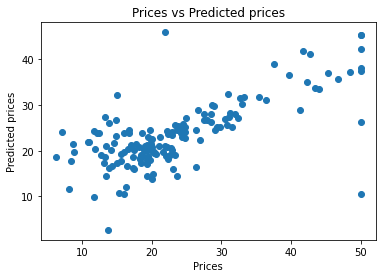

In [39]:
plt.scatter(y_test, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

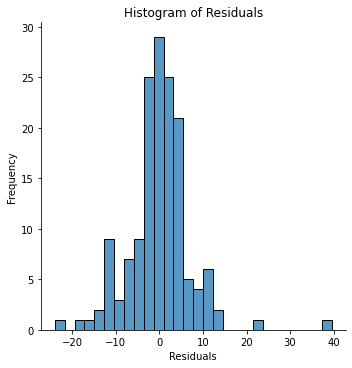

In [40]:
sns.displot(y_test-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [41]:
X = data.drop(['PRICE'], axis = 1)
y = data['PRICE']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

In [43]:
mlr = LinearRegression()

mlr.fit(X_test, y_test)

LinearRegression()

In [44]:
mlr.intercept_

44.03368368792822

In [45]:
mlr.coef_

array([-7.07283615e-02,  2.08089261e-02,  7.86576377e-02,  1.47921150e-01,
       -2.83008303e+01,  4.45296346e+00,  1.30847329e-02, -1.40724090e+00,
        2.13773910e-01, -7.62865113e-03, -1.39811247e+00,  9.17365562e-03,
       -5.14313591e-01])

In [46]:
coeffcients = pd.DataFrame([X_test.columns,mlr.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,CRIM,-0.070728
1,ZN,0.020809
2,INDUS,0.078658
3,CHAS,0.147921
4,NOX,-28.30083
5,RM,4.452963
6,AGE,0.013085
7,DIS,-1.407241
8,RAD,0.213774
9,TAX,-0.007629


In [47]:
y_pred = mlr.predict(X_test)

In [48]:
print('R^2:',metrics.r2_score(y_test, y_pred))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.7531219620979721
MAE: 3.5226741568374753
MSE: 25.77902256253253
RMSE: 5.07730465528045


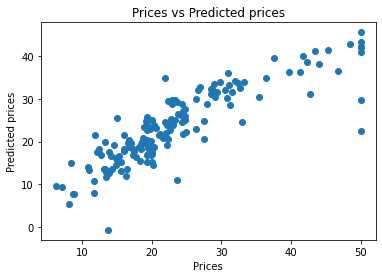

In [49]:
plt.scatter(y_test, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

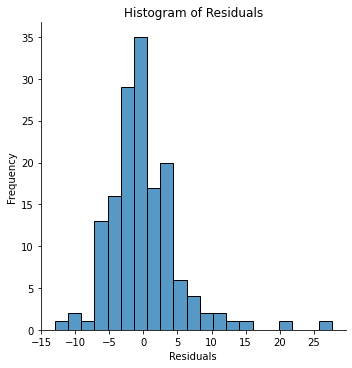

In [50]:
sns.displot(y_test-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()